In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = data['data']
Y = data['target']

In [6]:
feature_names = data['feature_names']
class_names = data['target_names']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X.shape

(569, 30)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X_train)

StandardScaler()

In [13]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)

In [14]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [15]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.659096,0.217205,1.610620,1.633339,0.576312,0.523545,0.645326,1.198745,-0.000094,-0.124425,...,1.567319,-0.075879,1.607223,1.384969,0.412628,0.461629,0.642584,0.701835,-0.556084,0.388781
1,-0.338165,-1.389968,-0.401667,-0.387017,-1.985604,-1.257886,-0.820500,-0.949158,-1.684127,-0.964260,...,-0.537720,-1.613244,-0.580788,-0.529160,-1.600400,-0.871596,-0.726165,-0.900606,-0.923646,-0.797233
2,0.874457,-0.651659,1.010370,0.761353,1.694102,2.359914,1.657179,2.389453,4.483419,1.570465,...,1.259163,-0.683527,1.364776,1.053712,0.978433,0.856293,0.491059,2.096751,1.767211,1.165217
3,0.920109,-0.498594,0.886180,0.806211,0.358755,0.012174,0.465964,0.918425,0.039744,-0.919986,...,0.759450,-0.098090,0.721243,0.625763,0.408208,-0.095834,0.274268,1.065079,0.345973,-0.157501
4,2.263981,0.586360,2.301943,2.408951,0.771362,1.747791,1.928079,2.649490,0.079581,-0.190837,...,2.385598,0.014555,2.639868,2.425295,-0.131075,0.816827,0.903190,1.921083,-0.262035,0.088673


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(X_train)

PCA(n_components=2)

In [19]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [20]:
pca_names

['pca_0', 'pca_1']

In [21]:
pca.components_.shape

(2, 30)

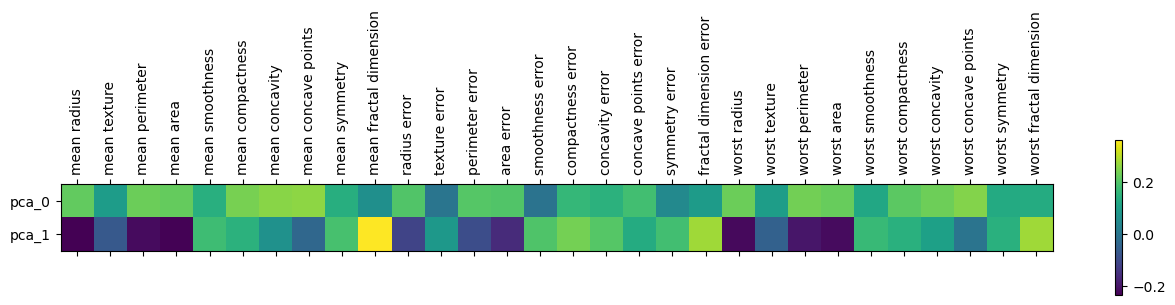

In [23]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]), labels=feature_names, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=pca_names)
plt.colorbar()
plt.show()

In [24]:
# objasnjena varijanas za svaku od glavnih komponenti
pca.explained_variance_

array([13.19960138,  5.86946172])

In [25]:
# udeo objasnjen varijanse za svaku od komponenti
pca.explained_variance_ratio_

array([0.43895388, 0.19518945])

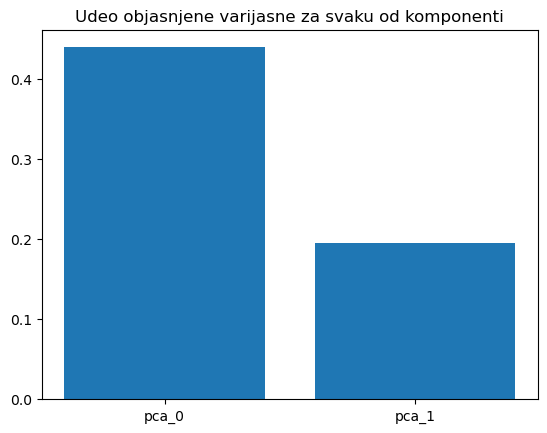

In [26]:
plt.bar(x=pca_names, height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijasne za svaku od komponenti')
plt.show()

In [27]:
cummulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

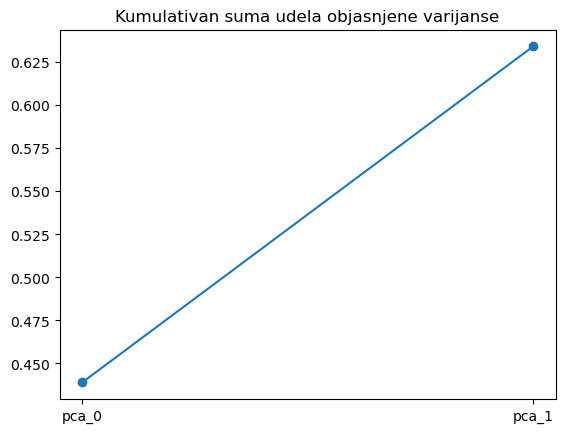

In [28]:
plt.plot(pca_names, cummulative_variance_ratio, marker='o')
plt.title('Kumulativan suma udela objasnjene varijanse')
plt.show()

In [29]:
X_train_pca = pca.transform(X_train)

In [30]:
X_test_pca = pca.transform(X_test)

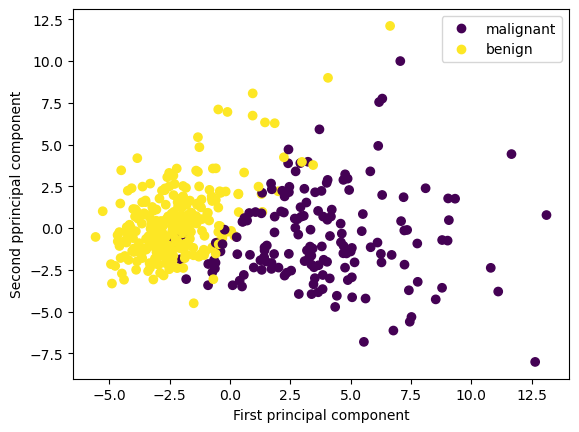

In [35]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second pprincipal component')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()